# Programming for DA


In [1]:
# t-test pip install
!pip install scipy

In [2]:
!pip install geopandas

In [3]:
!pip install missingno

In [5]:

# BASE
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt   

# STATISTICS 
import scipy.stats as stats
from scipy.stats import ttest_1samp  
from scipy.stats import ttest_ind 
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, levene, kruskal
from scipy.stats import f_oneway
import geopandas as gpd

# DATA CLEANNING AND PREPROCESSING 
import missingno as msno 
import seaborn as sb 
import matplotlib.pyplot as mp
from sklearn.preprocessing import OneHotEncoder

# MODELLING 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# MODEL EVALUATION 
from sklearn.model_selection import cross_val_score, GridSearchCV 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x: '%.3f'%x)
pd.set_option('display.width',500)

In [6]:
# load datasets
irl =  pd.read_excel("dash_irl.xlsx")
aus = pd.read_excel("aus.xlsx") 
eu = pd.read_excel("Construction costs europe.xlsx")

In [7]:
# head ireland dataset
irl.head()

,Month,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,January,109.200,113.500,115.900,118.000,122.900,126.300,135.800,154.300,169.900,174.200,179.600,184.700,189.900,198.800,207.400,208.000,206.900,210.200,202.500,204.100,204.900,206.200,207.400
1,February,109.300,114.100,115.700,118.500,123.100,126.400,136.100,154.700,170.000,174.500,179.700,184.800,190.100,198.800,208.200,207.300,207.200,210.500,202.600,204.200,205.400,206.000,207.100
2,March,109.400,114.100,115.900,118.800,123.800,126.500,136.400,155.600,169.500,174.500,179.900,184.900,190.600,199.400,208.600,206.800,207.300,200.700,202.700,204.300,205.400,206.500,0.000
3,April,110.300,114.100,115.900,119.800,123.800,130.500,136.500,157.400,169.500,177.300,179.900,186.500,194.000,200.000,208.900,206.500,207.900,201.000,203.400,204.500,205.600,206.800,0.000
4,May,110.100,114.100,115.900,119.800,124.500,130.500,136.800,157.600,169.500,177.300,180.000,186.600,194.200,200.100,209.400,206.500,208.700,201.200,203.600,204.500,205.900,207.200,0.000


In [8]:
# head austria
aus.head()

,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,0.000,0.000,61.000,62.100,62.700,62.800,63.400,64.100,64.500,65.100,66.400,67.600,69.400,72.100,75.600,78.100,81.200,83.700,85.900,87.000,88.300,88.900,90.100
1,0.000,0.000,0.000,1.800,0.900,0.200,0.900,1.100,0.700,0.900,2.000,1.800,2.700,3.800,5.000,3.300,3.900,3.100,2.600,1.300,1.500,0.700,1.300
2,61.000,0.000,0.000,1.500,1.300,1.100,1.400,1.800,1.300,1.500,3.000,2.600,2.900,4.300,4.800,2.200,1.800,2.800,2.600,2.500,2.500,1.800,1.900
3,62.100,0.000,0.000,2.500,0.100,-1.100,0.300,-0.100,-0.300,-0.200,0.200,0.500,2.400,3.200,5.100,4.600,6.200,3.500,2.600,-0.100,0.400,-0.700,0.600
4,62.700,52.800,53.500,55.200,56.300,57.700,59.100,60.800,61.900,63.800,67.000,68.300,71.300,75.000,79.700,80.200,82.600,84.600,86.400,88.000,89.300,90.300,91.500


In [9]:
# head europe 
eu.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Belgium,2.900,4.800,4.500,2.400,-1.100,0.000,3.900,1.900,0.200,1.100,1.600,1.600,1.300,2.500,2.500,1.700,NaN
1,Bulgaria,8.300,6.000,6.600,12.500,7.500,-1.300,0.600,-0.600,1.400,0.700,1.300,0.800,2.500,2.900,5.000,2.200,12.200
2,Czechia,3.800,2.100,4.700,3.600,-0.300,1.100,1.800,0.500,-0.400,1.200,0.000,0.300,2.700,4.100,5.500,2.100,8.300
3,Denmark,2.400,4.800,6.300,2.900,-0.300,1.100,3.600,2.600,1.500,1.600,1.900,1.600,0.800,1.800,0.800,0.800,4.000
4,Germany,1.500,2.400,3.300,3.300,0.300,2.200,3.700,2.000,0.700,0.900,1.300,1.300,3.300,3.400,2.000,1.500,7.300


# Data Preparation & Visualisation

### EDA

In [10]:
# view column names(ire) 

irl.columns

Index(['Month', 'year1994', 'year1995', 'year1996', 'year1997', 'year1998', 'year1999', 'year2000', 'year2001', 'year2002', 'year2003', 'year2004', 'year2005', 'year2006', 'year2007', 'year2008', 'year2009', 'year2010', 'year2011', 'year2012', 'year2013', 'year2014', 'year2015', 'year2016'], dtype='object')

In [11]:
aus.columns

Index(['year1994', 'year1995', 'year1996', 'year1997', 'year1998', 'year1999', 'year2000', 'year2001', 'year2002', 'year2003', 'year2004', 'year2005', 'year2006', 'year2007', 'year2008', 'year2009', 'year2010', 'year2011', 'year2012', 'year2013', 'year2014', 'year2015', 'year2016'], dtype='object')

In [12]:
eu.columns

Index(['Country', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], dtype='object')

In [13]:
# information about ireland 

irl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     10 non-null     object 
 1   year1994  10 non-null     float64
 2   year1995  10 non-null     float64
 3   year1996  10 non-null     float64
 4   year1997  10 non-null     float64
 5   year1998  10 non-null     float64
 6   year1999  10 non-null     float64
 7   year2000  10 non-null     float64
 8   year2001  10 non-null     float64
 9   year2002  10 non-null     float64
 10  year2003  10 non-null     float64
 11  year2004  10 non-null     float64
 12  year2005  10 non-null     float64
 13  year2006  10 non-null     float64
 14  year2007  10 non-null     float64
 15  year2008  10 non-null     float64
 16  year2009  10 non-null     float64
 17  year2010  10 non-null     float64
 18  year2011  10 non-null     float64
 19  year2012  10 non-null     float64
 20  year2013  10 non-null     float64
 

In [14]:
# information about austria 

aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year1994  8 non-null      float64
 1   year1995  8 non-null      float64
 2   year1996  8 non-null      float64
 3   year1997  8 non-null      float64
 4   year1998  8 non-null      float64
 5   year1999  8 non-null      float64
 6   year2000  8 non-null      float64
 7   year2001  8 non-null      float64
 8   year2002  8 non-null      float64
 9   year2003  8 non-null      float64
 10  year2004  8 non-null      float64
 11  year2005  8 non-null      float64
 12  year2006  8 non-null      float64
 13  year2007  8 non-null      float64
 14  year2008  8 non-null      float64
 15  year2009  8 non-null      float64
 16  year2010  8 non-null      float64
 17  year2011  8 non-null      float64
 18  year2012  8 non-null      float64
 19  year2013  8 non-null      float64
 20  year2014  8 non-null      float64
 2

In [15]:
# information about europe 

eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  33 non-null     object 
 1   2005     32 non-null     float64
 2   2006     33 non-null     float64
 3   2007     33 non-null     float64
 4   2008     33 non-null     float64
 5   2009     33 non-null     float64
 6   2010     33 non-null     float64
 7   2011     33 non-null     float64
 8   2012     33 non-null     float64
 9   2013     33 non-null     float64
 10  2014     33 non-null     float64
 11  2015     33 non-null     float64
 12  2016     33 non-null     float64
 13  2017     33 non-null     float64
 14  2018     33 non-null     float64
 15  2019     33 non-null     float64
 16  2020     33 non-null     float64
 17  2021     24 non-null     float64
dtypes: float64(17), object(1)
memory usage: 4.8+ KB


In [17]:
# check any null value  
# ireland 

irl.isnull().sum()

Month       0
year1994    0
year1995    0
year1996    0
year1997    0
year1998    0
year1999    0
year2000    0
year2001    0
year2002    0
year2003    0
year2004    0
year2005    0
year2006    0
year2007    0
year2008    0
year2009    0
year2010    0
year2011    0
year2012    0
year2013    0
year2014    0
year2015    0
year2016    0
dtype: int64

In [18]:
# check any null value 
# austria 

aus.isnull().sum()

year1994    0
year1995    0
year1996    0
year1997    0
year1998    0
year1999    0
year2000    0
year2001    0
year2002    0
year2003    0
year2004    0
year2005    0
year2006    0
year2007    0
year2008    0
year2009    0
year2010    0
year2011    0
year2012    0
year2013    0
year2014    0
year2015    0
year2016    0
dtype: int64

In [19]:
# check any null value  
# europe 

eu.isnull().sum()

Country    0
2005       1
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       9
dtype: int64

Convert NaN entries to missing

In [20]:
#Recode missing values if any
irl = irl.replace(np.nan, np.nan, regex=True)
#Austria
aus = aus.replace(np.nan, np.nan, regex=True)

#Europe
eu = eu.replace(np.nan, np.nan, regex=True)

In [21]:
miss = pd.DataFrame(irl.isna().sum())
miss = miss.reset_index()
miss.columns = ["Indicator",'Ireland']
miss

,Indicator,Ireland
0,Month,0
1,year1994,0
2,year1995,0
3,year1996,0
4,year1997,0
5,year1998,0
6,year1999,0
7,year2000,0
8,year2001,0
9,year2002,0


C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_18628\4241178652.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msno.heatmap(irl.append(irl).append(aus), cmap='YlGnBu');


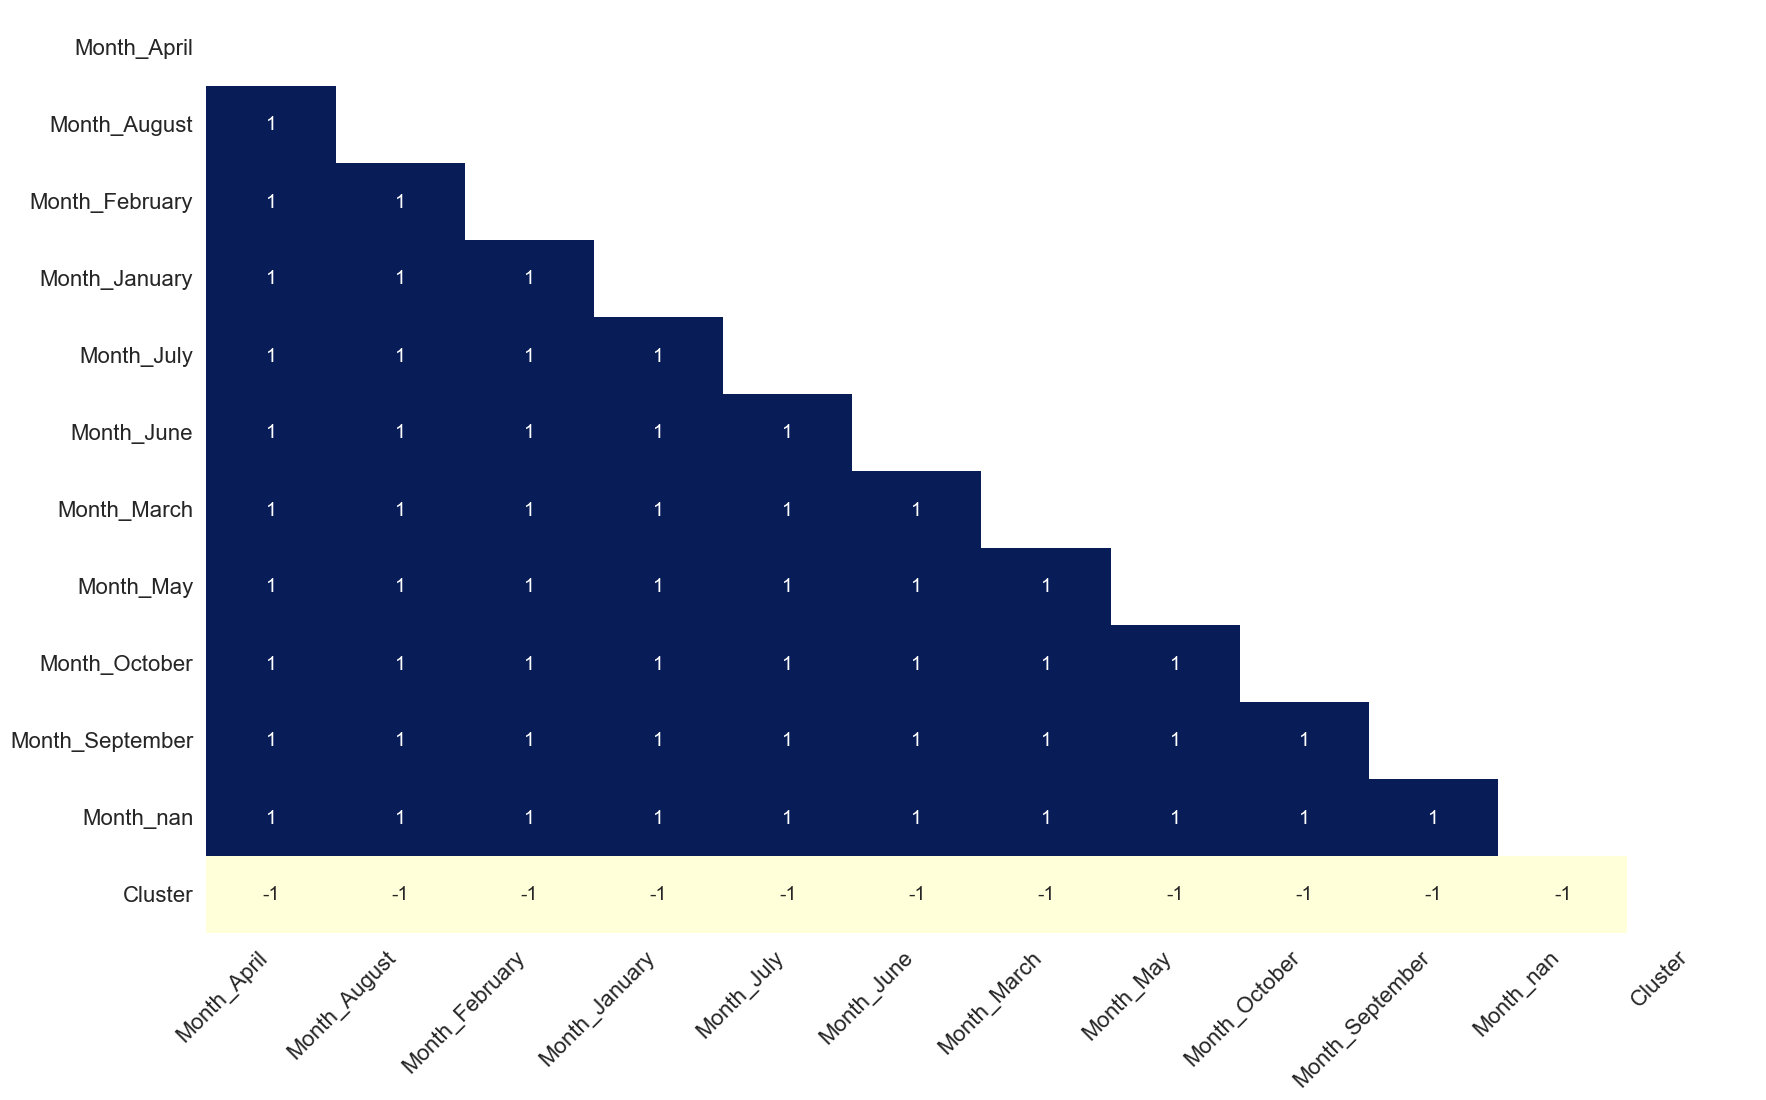

In [105]:
plt.rcParams['figure.figsize'] = 10,6
msno.heatmap(irl.append(irl).append(aus), cmap='YlGnBu');

In [22]:
miss = pd.DataFrame(aus.isna().sum())
miss = miss.reset_index()
miss.columns = ["Indicator",'Austria']
miss

,Indicator,Austria
0,year1994,0
1,year1995,0
2,year1996,0
3,year1997,0
4,year1998,0
5,year1999,0
6,year2000,0
7,year2001,0
8,year2002,0
9,year2003,0


In [ ]:
plt.rcParams['figure.figsize'] = 10,6
msno.heatmap(irl.append(irl).append(aus), cmap='YlGnBu');

In [23]:
# check data types 
# ireland 

irl.dtypes

Month        object
year1994    float64
year1995    float64
year1996    float64
year1997    float64
year1998    float64
year1999    float64
year2000    float64
year2001    float64
year2002    float64
year2003    float64
year2004    float64
year2005    float64
year2006    float64
year2007    float64
year2008    float64
year2009    float64
year2010    float64
year2011    float64
year2012    float64
year2013    float64
year2014    float64
year2015    float64
year2016    float64
dtype: object

Check number of missing in complete data

C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_18628\1023393525.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msno.heatmap(irl.append(eu).append(aus), cmap='YlGnBu');
C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_18628\1023393525.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msno.heatmap(irl.append(eu).append(aus), cmap='YlGnBu');


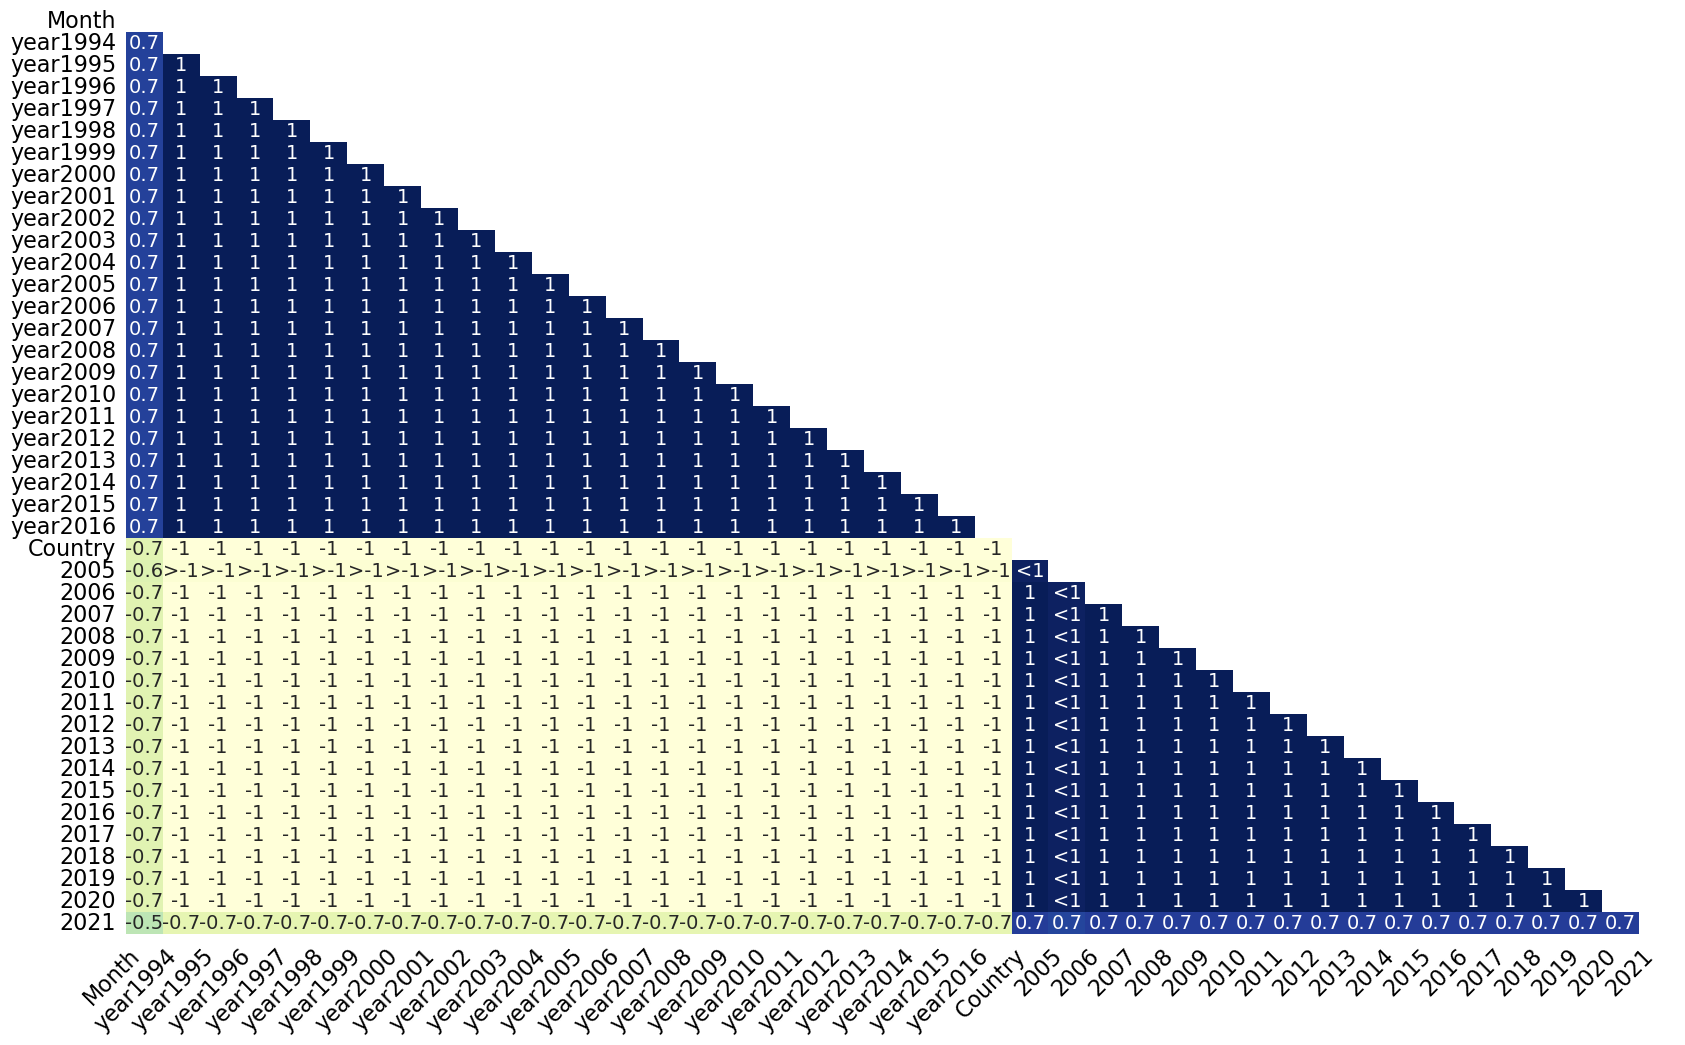

In [24]:
plt.rcParams['figure.figsize'] = 10,6
msno.heatmap(irl.append(eu).append(aus), cmap='YlGnBu');

In [25]:
# check data types 
# austria 

aus.dtypes

year1994    float64
year1995    float64
year1996    float64
year1997    float64
year1998    float64
year1999    float64
year2000    float64
year2001    float64
year2002    float64
year2003    float64
year2004    float64
year2005    float64
year2006    float64
year2007    float64
year2008    float64
year2009    float64
year2010    float64
year2011    float64
year2012    float64
year2013    float64
year2014    float64
year2015    float64
year2016    float64
dtype: object

In [26]:
# check data types 
# europe 

eu.dtypes

Country     object
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
dtype: object

### Categorical and Numerical Data

In [27]:
# ireland categorical value 
cat_cols = [col for col in irl.columns if str(irl[col].dtypes) in ["category","object","bool"] ] 

cat_cols

['Month']

In [28]:
# austria categorical value
cat_cols = [col for col in aus.columns if str(aus[col].dtypes) in ["category","object","bool"] ] 

cat_cols


[]

In [29]:
# europe categorical value

cat_cols = [col for col in eu.columns if str(eu[col].dtypes) in ["category","object","bool"] ] 

cat_cols

['Country']

In [30]:
# ireland
# numerical value 

num_cols = [col for col in irl.columns if irl[col].dtypes in ["int","float"]] 
num_cols

['year1994',
 'year1995',
 'year1996',
 'year1997',
 'year1998',
 'year1999',
 'year2000',
 'year2001',
 'year2002',
 'year2003',
 'year2004',
 'year2005',
 'year2006',
 'year2007',
 'year2008',
 'year2009',
 'year2010',
 'year2011',
 'year2012',
 'year2013',
 'year2014',
 'year2015',
 'year2016']

In [31]:
# austria
# numerical value 

num_cols = [col for col in aus.columns if aus[col].dtypes in ["int","float"]] 
num_cols

['year1994',
 'year1995',
 'year1996',
 'year1997',
 'year1998',
 'year1999',
 'year2000',
 'year2001',
 'year2002',
 'year2003',
 'year2004',
 'year2005',
 'year2006',
 'year2007',
 'year2008',
 'year2009',
 'year2010',
 'year2011',
 'year2012',
 'year2013',
 'year2014',
 'year2015',
 'year2016']

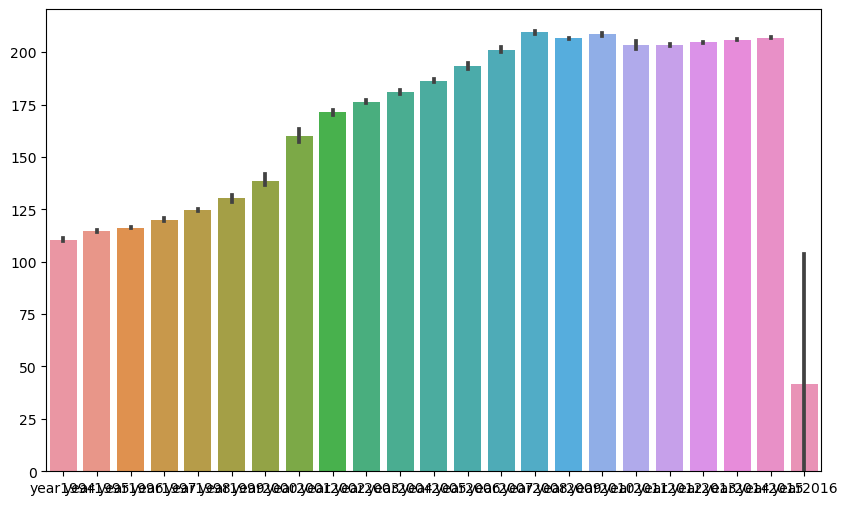

In [32]:
sns.barplot(irl);

<Axes: >

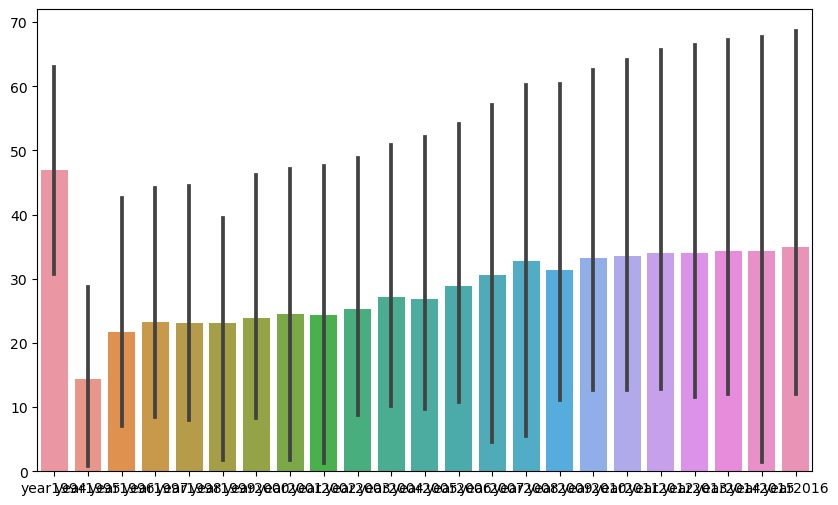

In [33]:
sns.barplot(aus)

<Axes: ylabel='Count'>

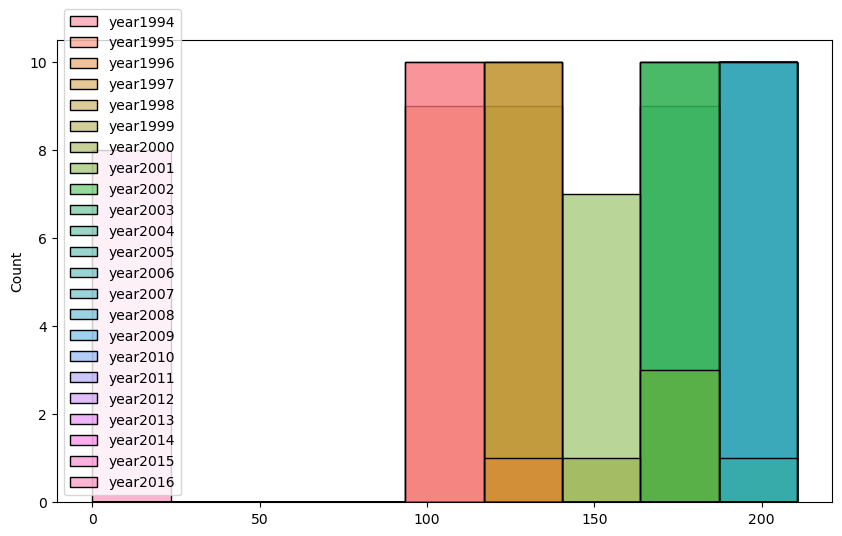

In [34]:
sns.histplot(irl)

<Axes: ylabel='Count'>

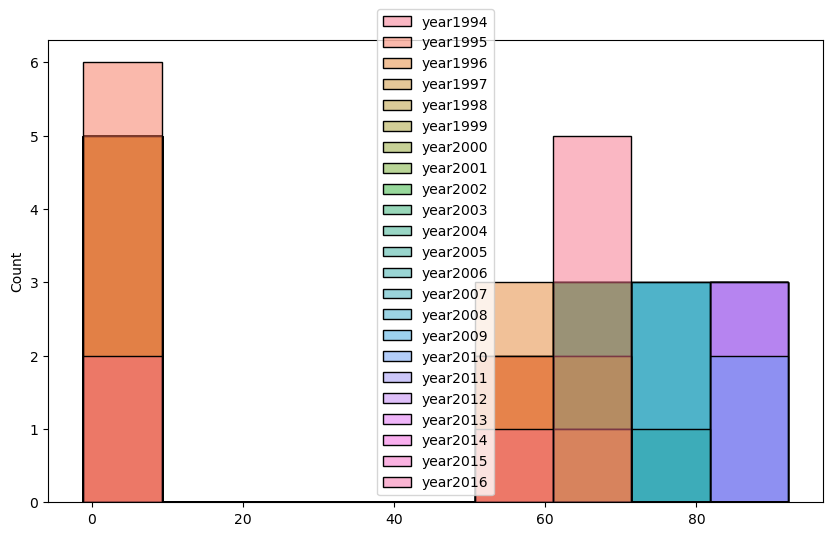

In [35]:
sns.histplot(aus)

# Statistics for Data Analytics

Descriptive statistics

In [36]:
irl.describe()

,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,110.540,114.450,116.130,120.010,124.620,130.250,138.440,159.960,171.360,176.390,180.870,186.410,193.430,201.220,209.380,206.540,208.460,203.250,203.410,204.670,205.890,206.960,41.450
std,1.177,0.738,0.469,1.319,1.219,3.026,5.426,5.336,2.171,1.378,1.447,1.414,2.470,2.192,1.069,0.664,1.060,3.769,0.601,0.422,0.576,0.554,87.384
min,109.200,113.500,115.700,118.000,122.900,126.300,135.800,154.300,169.500,174.200,179.600,184.700,189.900,198.800,207.400,206.000,206.900,200.700,202.500,204.100,204.900,206.000,0.000
25%,109.575,114.100,115.900,119.050,123.800,127.500,136.425,156.050,169.550,175.150,179.900,185.300,191.450,199.550,208.675,206.025,207.450,201.250,202.875,204.350,205.450,206.575,0.000
50%,110.450,114.100,115.950,119.850,124.500,130.500,136.850,157.650,169.950,177.200,180.100,186.600,194.250,200.200,209.650,206.350,208.650,201.700,203.600,204.650,205.950,207.200,0.000
75%,110.850,114.500,116.000,120.950,125.700,131.500,137.200,164.700,173.875,177.275,181.925,186.850,194.475,203.675,210.325,206.725,209.475,202.075,203.775,204.950,206.300,207.375,0.000
max,112.700,115.800,117.100,122.000,126.200,134.700,153.800,169.300,173.900,177.400,183.900,189.500,197.700,203.800,210.500,208.000,209.600,210.500,204.100,205.400,206.700,207.600,207.400


In [37]:
# Assuming your DataFrame is called 'irl'
# Calculate the mean for each column
mean_values = irl.iloc[:, 1:].mean()

# Calculate the standard deviation for each column
std_values = irl.iloc[:, 1:].std()

# Calculate the median for each column
median_values = irl.iloc[:, 1:].median()

# Print the mean, standard deviation, and median for each column
print("Mean values:")
print(mean_values)
print("\nStandard deviation values:")
print(std_values)
print("\nMedian values:")
print(median_values)

Mean values:
year1994   110.540
year1995   114.450
year1996   116.130
year1997   120.010
year1998   124.620
year1999   130.250
year2000   138.440
year2001   159.960
year2002   171.360
year2003   176.390
year2004   180.870
year2005   186.410
year2006   193.430
year2007   201.220
year2008   209.380
year2009   206.540
year2010   208.460
year2011   203.250
year2012   203.410
year2013   204.670
year2014   205.890
year2015   206.960
year2016    41.450
dtype: float64

Standard deviation values:
year1994    1.177
year1995    0.738
year1996    0.469
year1997    1.319
year1998    1.219
year1999    3.026
year2000    5.426
year2001    5.336
year2002    2.171
year2003    1.378
year2004    1.447
year2005    1.414
year2006    2.470
year2007    2.192
year2008    1.069
year2009    0.664
year2010    1.060
year2011    3.769
year2012    0.601
year2013    0.422
year2014    0.576
year2015    0.554
year2016   87.384
dtype: float64

Median values:
year1994   110.450
year1995   114.100
year1996   115.950
year1

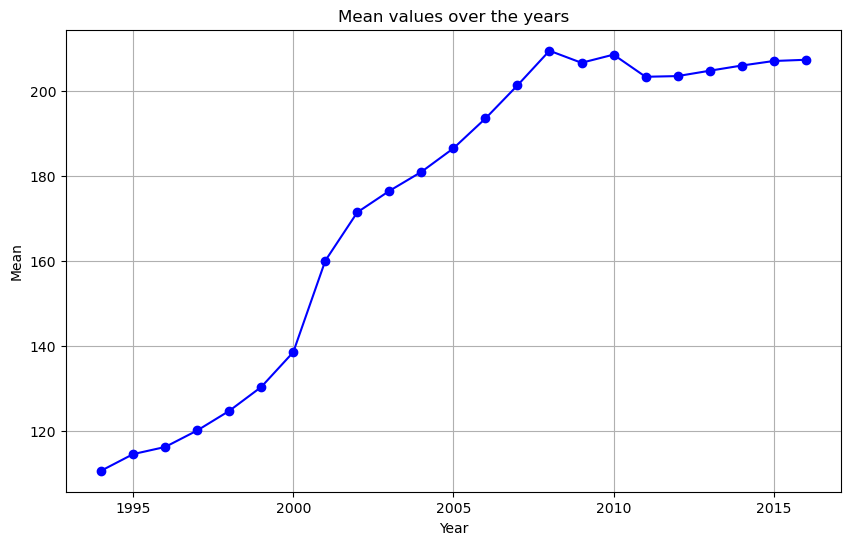

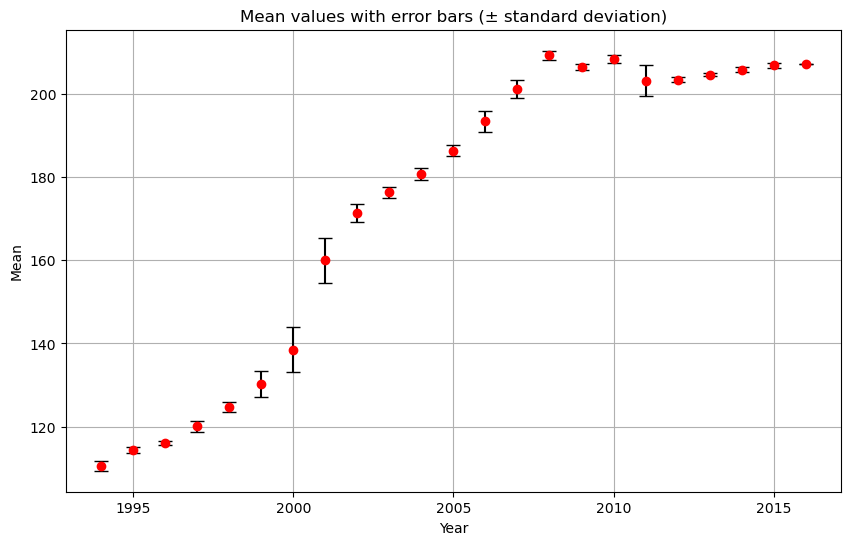

In [38]:
# Data
years = [
    1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
    2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016
]

means = [
    110.540, 114.450, 116.130, 120.010, 124.620, 130.250, 138.440, 159.960,
    171.360, 176.390, 180.870, 186.410, 193.430, 201.220, 209.380, 206.540,
    208.460, 203.250, 203.410, 204.670, 205.890, 206.960, 207.250
]
stds = [
    1.177, 0.738, 0.469, 1.319, 1.219, 3.026, 5.426, 5.336, 2.171, 1.378,
    1.447, 1.414, 2.470, 2.192, 1.069, 0.664, 1.060, 3.769, 0.601, 0.422,
    0.576, 0.554, 0.071
]

# Line plot for mean values
plt.plot(years, means, marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Mean values over the years')
plt.grid(True)
plt.show()


# Error bar plot for mean and standard deviation
plt.errorbar(years, means, yerr=stds, fmt='o', color='red', ecolor='black', capsize=5)
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Mean values with error bars (± standard deviation)')
plt.grid(True)
plt.show()

In [39]:
aus.describe()

,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
count,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000
mean,47.013,14.325,21.712,23.312,23.062,23.175,23.900,24.438,24.388,25.275,27.188,26.875,28.900,30.587,32.800,31.362,33.200,33.500,33.987,33.950,34.362,34.375,34.938
std,29.031,24.539,29.189,29.037,30.064,30.710,31.026,31.598,32.292,32.721,33.343,34.647,35.191,36.471,38.011,40.167,40.877,42.375,43.570,44.795,45.471,46.266,46.623
min,0.000,0.000,0.000,1.500,0.100,-1.100,0.300,-0.100,-0.300,-0.200,0.200,0.500,2.400,3.200,4.800,0.600,1.800,2.200,2.100,-0.100,0.400,-0.700,0.600
25%,45.750,0.000,0.000,2.325,1.200,0.875,1.275,1.625,1.150,1.350,2.750,1.875,2.850,4.175,5.075,1.825,3.125,2.700,2.500,1.750,1.425,0.925,1.125
50%,62.400,1.600,1.550,2.900,2.150,2.300,2.300,2.500,1.650,2.850,5.050,2.350,4.550,4.800,5.750,3.950,5.050,3.300,2.600,2.200,2.000,1.650,1.650
75%,62.950,15.750,54.150,55.800,56.950,58.300,59.700,61.300,62.350,64.125,66.550,67.775,69.875,72.825,76.625,78.625,81.550,83.925,86.025,87.250,88.550,89.250,90.450
max,64.100,55.200,61.000,62.100,62.700,62.800,63.400,64.100,64.500,65.400,68.800,70.200,73.400,76.700,80.700,81.200,83.800,85.700,87.500,89.100,90.200,91.500,92.100


In [40]:
# Assuming your DataFrame is called 'aus'
# Calculate the mean for each column


mean_values = aus.iloc[:, 1:].mean()

# Calculate the standard deviation for each column
std_values = aus.iloc[:, 1:].std()

# Calculate the median for each column
median_values = aus.iloc[:, 1:].median()

# Print the mean, standard deviation, and median for each column
print("Mean values:")
print(mean_values)
print("\nStandard deviation values:")
print(std_values)
print("\nMedian values:")
print(median_values)

Mean values:
year1995   14.325
year1996   21.712
year1997   23.312
year1998   23.062
year1999   23.175
year2000   23.900
year2001   24.438
year2002   24.388
year2003   25.275
year2004   27.188
year2005   26.875
year2006   28.900
year2007   30.587
year2008   32.800
year2009   31.362
year2010   33.200
year2011   33.500
year2012   33.987
year2013   33.950
year2014   34.362
year2015   34.375
year2016   34.938
dtype: float64

Standard deviation values:
year1995   24.539
year1996   29.189
year1997   29.037
year1998   30.064
year1999   30.710
year2000   31.026
year2001   31.598
year2002   32.292
year2003   32.721
year2004   33.343
year2005   34.647
year2006   35.191
year2007   36.471
year2008   38.011
year2009   40.167
year2010   40.877
year2011   42.375
year2012   43.570
year2013   44.795
year2014   45.471
year2015   46.266
year2016   46.623
dtype: float64

Median values:
year1995   1.600
year1996   1.550
year1997   2.900
year1998   2.150
year1999   2.300
year2000   2.300
year2001   2.500
ye

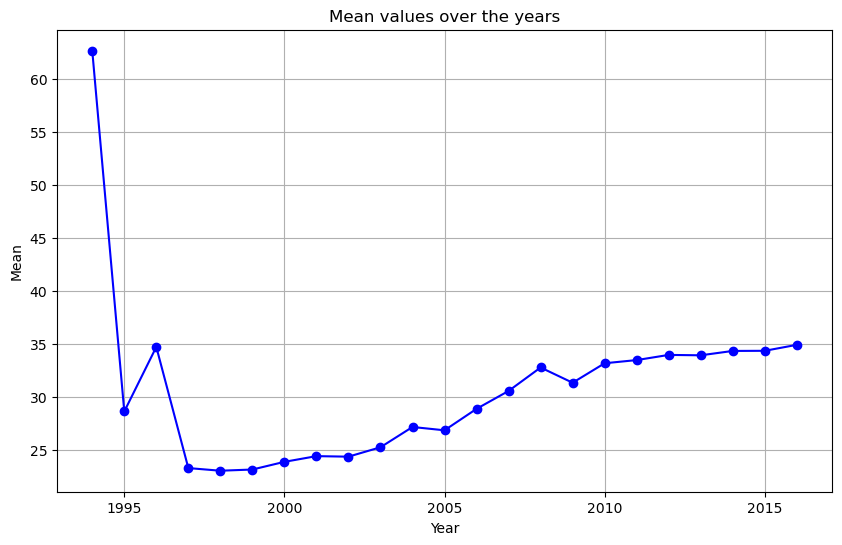

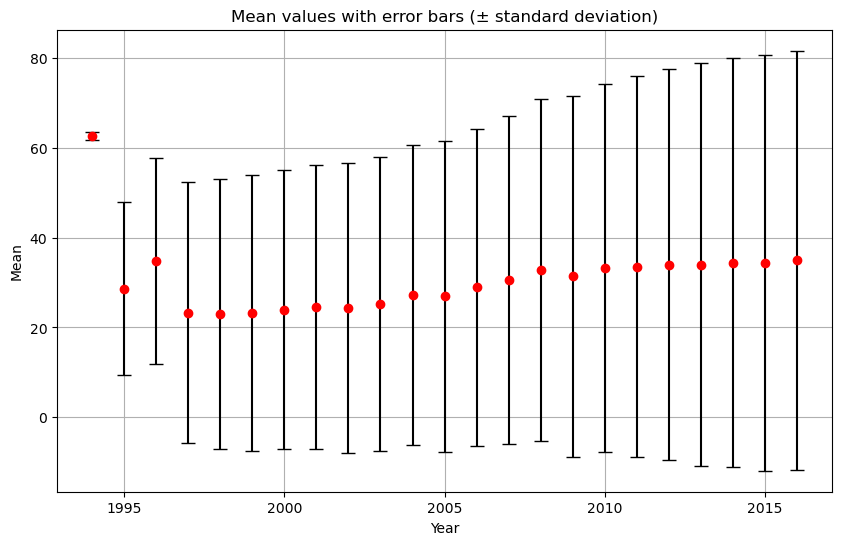

In [41]:
# Data
years = [
    1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
    2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016
]

means = [
    62.683, 28.650, 34.740, 23.312, 23.062, 23.175, 23.900, 24.438, 24.388,
    25.275, 27.188, 26.875, 28.900, 30.587, 32.800, 31.362, 33.200, 33.500,
    33.987, 33.950, 34.362, 34.375, 34.938
]
stds = [
    0.903, 19.174, 22.994, 29.037, 30.064, 30.710, 31.026, 31.598, 32.292,
    32.721, 33.343, 34.647, 35.191, 36.471, 38.011, 40.167, 40.877, 42.375,
    43.570, 44.795, 45.471, 46.266, 46.623
]

# Line plot for mean values
plt.plot(years, means, marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Mean values over the years')
plt.grid(True)
plt.show()


# Error bar plot for mean and standard deviation
plt.errorbar(years, means, yerr=stds, fmt='o', color='red', ecolor='black', capsize=5)
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Mean values with error bars (± standard deviation)')
plt.grid(True)
plt.show()

T-test

In [42]:
irl.head()

,Month,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,January,109.200,113.500,115.900,118.000,122.900,126.300,135.800,154.300,169.900,174.200,179.600,184.700,189.900,198.800,207.400,208.000,206.900,210.200,202.500,204.100,204.900,206.200,207.400
1,February,109.300,114.100,115.700,118.500,123.100,126.400,136.100,154.700,170.000,174.500,179.700,184.800,190.100,198.800,208.200,207.300,207.200,210.500,202.600,204.200,205.400,206.000,207.100
2,March,109.400,114.100,115.900,118.800,123.800,126.500,136.400,155.600,169.500,174.500,179.900,184.900,190.600,199.400,208.600,206.800,207.300,200.700,202.700,204.300,205.400,206.500,0.000
3,April,110.300,114.100,115.900,119.800,123.800,130.500,136.500,157.400,169.500,177.300,179.900,186.500,194.000,200.000,208.900,206.500,207.900,201.000,203.400,204.500,205.600,206.800,0.000
4,May,110.100,114.100,115.900,119.800,124.500,130.500,136.800,157.600,169.500,177.300,180.000,186.600,194.200,200.100,209.400,206.500,208.700,201.200,203.600,204.500,205.900,207.200,0.000


In [84]:
# irl 2014 - 2015 
# t-statistics 

irl = pd.DataFrame(irl)

# Perform the t-test
t_statistic, p_value = ttest_ind(irl['year2014'], irl['year2015'], nan_policy='omit')

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: -4.232118752188478
p-value: 0.0005011652982170444


In [44]:
aus.head()

,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,0.000,0.000,61.000,62.100,62.700,62.800,63.400,64.100,64.500,65.100,66.400,67.600,69.400,72.100,75.600,78.100,81.200,83.700,85.900,87.000,88.300,88.900,90.100
1,0.000,0.000,0.000,1.800,0.900,0.200,0.900,1.100,0.700,0.900,2.000,1.800,2.700,3.800,5.000,3.300,3.900,3.100,2.600,1.300,1.500,0.700,1.300
2,61.000,0.000,0.000,1.500,1.300,1.100,1.400,1.800,1.300,1.500,3.000,2.600,2.900,4.300,4.800,2.200,1.800,2.800,2.600,2.500,2.500,1.800,1.900
3,62.100,0.000,0.000,2.500,0.100,-1.100,0.300,-0.100,-0.300,-0.200,0.200,0.500,2.400,3.200,5.100,4.600,6.200,3.500,2.600,-0.100,0.400,-0.700,0.600
4,62.700,52.800,53.500,55.200,56.300,57.700,59.100,60.800,61.900,63.800,67.000,68.300,71.300,75.000,79.700,80.200,82.600,84.600,86.400,88.000,89.300,90.300,91.500


In [86]:
# aus 2014 - 2014 t-statistics 

aus = pd.DataFrame(aus)

# Perform the t-test
t_statistic, p_value = ttest_ind(aus['year2014'], aus['year2015'], nan_policy='omit')

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: -0.0005450128213722044
p-value: 0.9995728326467744


In [83]:
eu.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Belgium,2.900,4.800,4.500,2.400,-1.100,0.000,3.900,1.900,0.200,1.100,1.600,1.600,1.300,2.500,2.500,1.700,NaN
1,Bulgaria,8.300,6.000,6.600,12.500,7.500,-1.300,0.600,-0.600,1.400,0.700,1.300,0.800,2.500,2.900,5.000,2.200,12.200
2,Czechia,3.800,2.100,4.700,3.600,-0.300,1.100,1.800,0.500,-0.400,1.200,0.000,0.300,2.700,4.100,5.500,2.100,8.300
3,Denmark,2.400,4.800,6.300,2.900,-0.300,1.100,3.600,2.600,1.500,1.600,1.900,1.600,0.800,1.800,0.800,0.800,4.000
4,Germany,1.500,2.400,3.300,3.300,0.300,2.200,3.700,2.000,0.700,0.900,1.300,1.300,3.300,3.400,2.000,1.500,7.300


In [85]:
# t-statistics eu 
# 2014 - 2015 

eu = pd.DataFrame(eu)

# Perform the t-test
t_statistic, p_value = ttest_ind(eu['2014'], eu['2015'], nan_policy='omit')

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: 0.14006206685019307
p-value: 0.8890508180047323


Wilcoxon test

In [46]:
irl = pd.read_excel("dash_irl.xlsx") 
aus = pd.read_excel("aus.xlsx") 
eu  = pd.read_excel("Construction costs europe.xlsx")

In [47]:
irl.head(11)

,Month,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,January,109.200,113.500,115.900,118.000,122.900,126.300,135.800,154.300,169.900,174.200,179.600,184.700,189.900,198.800,207.400,208.000,206.900,210.200,202.500,204.100,204.900,206.200,207.400
1,February,109.300,114.100,115.700,118.500,123.100,126.400,136.100,154.700,170.000,174.500,179.700,184.800,190.100,198.800,208.200,207.300,207.200,210.500,202.600,204.200,205.400,206.000,207.100
2,March,109.400,114.100,115.900,118.800,123.800,126.500,136.400,155.600,169.500,174.500,179.900,184.900,190.600,199.400,208.600,206.800,207.300,200.700,202.700,204.300,205.400,206.500,0.000
3,April,110.300,114.100,115.900,119.800,123.800,130.500,136.500,157.400,169.500,177.300,179.900,186.500,194.000,200.000,208.900,206.500,207.900,201.000,203.400,204.500,205.600,206.800,0.000
4,May,110.100,114.100,115.900,119.800,124.500,130.500,136.800,157.600,169.500,177.300,180.000,186.600,194.200,200.100,209.400,206.500,208.700,201.200,203.600,204.500,205.900,207.200,0.000
5,June,110.600,114.100,116.000,119.900,124.500,130.500,136.900,157.700,169.700,177.400,180.200,186.600,194.300,200.300,209.900,206.000,208.600,201.400,203.600,204.800,206.000,207.600,0.000
6,July,110.700,114.500,116.000,120.800,125.700,131.500,137.200,161.100,173.800,177.100,181.100,186.700,194.400,203.700,210.400,206.000,209.400,201.500,204.100,204.800,206.000,207.400,0.000
7,August,110.900,114.500,116.000,121.000,125.700,131.500,137.200,165.900,173.900,177.200,182.200,186.900,194.500,203.600,210.400,206.000,209.600,201.900,204.100,205.000,206.600,207.400,0.000
8,September,112.200,115.700,116.900,121.500,126.000,134.100,137.700,166.000,173.900,177.200,182.200,186.900,194.600,203.700,210.500,206.100,209.500,202.100,203.700,205.100,206.400,207.300,0.000
9,October,112.700,115.800,117.100,122.000,126.200,134.700,153.800,169.300,173.900,177.200,183.900,189.500,197.700,203.800,210.100,206.200,209.500,202.000,203.800,205.400,206.700,207.200,0.000


In [93]:
# irl 2014 - 2015 

irl = pd.DataFrame(irl)

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(irl['year2014'], irl['year2015'])

# Print the results
print(f"Wilcoxon statistic: {statistic}")
print(f"p-value: {p_value}")

Wilcoxon statistic: 0.0
p-value: 0.001953125


In [49]:
aus.head(10)

,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,0.000,0.000,61.000,62.100,62.700,62.800,63.400,64.100,64.500,65.100,66.400,67.600,69.400,72.100,75.600,78.100,81.200,83.700,85.900,87.000,88.300,88.900,90.100
1,0.000,0.000,0.000,1.800,0.900,0.200,0.900,1.100,0.700,0.900,2.000,1.800,2.700,3.800,5.000,3.300,3.900,3.100,2.600,1.300,1.500,0.700,1.300
2,61.000,0.000,0.000,1.500,1.300,1.100,1.400,1.800,1.300,1.500,3.000,2.600,2.900,4.300,4.800,2.200,1.800,2.800,2.600,2.500,2.500,1.800,1.900
3,62.100,0.000,0.000,2.500,0.100,-1.100,0.300,-0.100,-0.300,-0.200,0.200,0.500,2.400,3.200,5.100,4.600,6.200,3.500,2.600,-0.100,0.400,-0.700,0.600
4,62.700,52.800,53.500,55.200,56.300,57.700,59.100,60.800,61.900,63.800,67.000,68.300,71.300,75.000,79.700,80.200,82.600,84.600,86.400,88.000,89.300,90.300,91.500
5,62.800,3.200,1.500,3.100,2.100,2.500,2.300,2.900,1.800,3.100,5.000,1.900,4.500,5.100,6.300,0.700,2.900,2.400,2.200,1.900,1.500,1.000,1.400
6,63.400,55.200,56.100,57.600,58.900,60.100,61.500,62.800,63.700,65.400,68.800,70.200,73.400,76.700,80.700,81.200,83.800,85.700,87.500,89.100,90.200,91.500,92.100
7,64.100,3.400,1.600,2.700,2.200,2.100,2.300,2.100,1.500,2.600,5.100,2.100,4.600,4.500,5.200,0.600,3.200,2.200,2.100,1.900,1.200,1.500,0.600


In [94]:
# aus 2014 - 2015 

aus = pd.DataFrame(aus)

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(aus['year2014'], aus['year2015'])

# Print the results
print(f"Wilcoxon statistic: {statistic}")
print(f"p-value: {p_value}")

Wilcoxon statistic: 18.0
p-value: 1.0


In [90]:
eu.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Belgium,2.900,4.800,4.500,2.400,-1.100,0.000,3.900,1.900,0.200,1.100,1.600,1.600,1.300,2.500,2.500,1.700,NaN
1,Bulgaria,8.300,6.000,6.600,12.500,7.500,-1.300,0.600,-0.600,1.400,0.700,1.300,0.800,2.500,2.900,5.000,2.200,12.200
2,Czechia,3.800,2.100,4.700,3.600,-0.300,1.100,1.800,0.500,-0.400,1.200,0.000,0.300,2.700,4.100,5.500,2.100,8.300
3,Denmark,2.400,4.800,6.300,2.900,-0.300,1.100,3.600,2.600,1.500,1.600,1.900,1.600,0.800,1.800,0.800,0.800,4.000
4,Germany,1.500,2.400,3.300,3.300,0.300,2.200,3.700,2.000,0.700,0.900,1.300,1.300,3.300,3.400,2.000,1.500,7.300


In [92]:
# eu 2014 - 2015 

eu = pd.DataFrame(eu)

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(eu['2014'], eu['2015'])

# Print the results
print(f"Wilcoxon statistic: {statistic}")
print(f"p-value: {p_value}")

Wilcoxon statistic: 261.5
p-value: 0.9627007428430175


D:\Anaconda\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


chi-squared test

In [51]:
irl.head(11)

,Month,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,January,109.200,113.500,115.900,118.000,122.900,126.300,135.800,154.300,169.900,174.200,179.600,184.700,189.900,198.800,207.400,208.000,206.900,210.200,202.500,204.100,204.900,206.200,207.400
1,February,109.300,114.100,115.700,118.500,123.100,126.400,136.100,154.700,170.000,174.500,179.700,184.800,190.100,198.800,208.200,207.300,207.200,210.500,202.600,204.200,205.400,206.000,207.100
2,March,109.400,114.100,115.900,118.800,123.800,126.500,136.400,155.600,169.500,174.500,179.900,184.900,190.600,199.400,208.600,206.800,207.300,200.700,202.700,204.300,205.400,206.500,0.000
3,April,110.300,114.100,115.900,119.800,123.800,130.500,136.500,157.400,169.500,177.300,179.900,186.500,194.000,200.000,208.900,206.500,207.900,201.000,203.400,204.500,205.600,206.800,0.000
4,May,110.100,114.100,115.900,119.800,124.500,130.500,136.800,157.600,169.500,177.300,180.000,186.600,194.200,200.100,209.400,206.500,208.700,201.200,203.600,204.500,205.900,207.200,0.000
5,June,110.600,114.100,116.000,119.900,124.500,130.500,136.900,157.700,169.700,177.400,180.200,186.600,194.300,200.300,209.900,206.000,208.600,201.400,203.600,204.800,206.000,207.600,0.000
6,July,110.700,114.500,116.000,120.800,125.700,131.500,137.200,161.100,173.800,177.100,181.100,186.700,194.400,203.700,210.400,206.000,209.400,201.500,204.100,204.800,206.000,207.400,0.000
7,August,110.900,114.500,116.000,121.000,125.700,131.500,137.200,165.900,173.900,177.200,182.200,186.900,194.500,203.600,210.400,206.000,209.600,201.900,204.100,205.000,206.600,207.400,0.000
8,September,112.200,115.700,116.900,121.500,126.000,134.100,137.700,166.000,173.900,177.200,182.200,186.900,194.600,203.700,210.500,206.100,209.500,202.100,203.700,205.100,206.400,207.300,0.000
9,October,112.700,115.800,117.100,122.000,126.200,134.700,153.800,169.300,173.900,177.200,183.900,189.500,197.700,203.800,210.100,206.200,209.500,202.000,203.800,205.400,206.700,207.200,0.000


In [52]:
# Example of the Chi-Squared Test (2014 - 2015) 
# irl

table = [[204.7, 205.4, 205.4, 205.6, 205.9 , 206.0, 206.0, 206.6],[206.2, 206.0, 206.5, 206.8, 207.2, 207.4, 207.4, 204.4]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.026, p=1.000
Probably independent


In [53]:
# Example of the Chi-Squared Test (2014 - 2015) 
# aus

table = [[88.3, 1.5, 2.5, 0.4, 89.4 , 1.5, 90.2, 1.2],[89.9, 0.7, 1.8, 0.7, 90.3, 1.0, 91.5, 1.5]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.638, p=0.999
Probably independent


among test

Variace Analysis

In [54]:

def variance_analysis(dataframe):
    # Calculate the variance for each column (month/year)
    variances = dataframe.var()

    # Drop any columns that contain NaN values
    variances = variances.dropna()

    # Perform ANOVA on the remaining columns
    f_statistic, p_value = f_oneway(*[dataframe[col] for col in variances.index])

    # Return the results as a dictionary
    results = {
        'variances': variances,
        'f_statistic': f_statistic,
        'p_value': p_value
    }

    return results


In [55]:
# variance analysis irl(2014-2015)
# Create a DataFrame from the provided data
data = {
    '2014' : [206.2, 205.4, 205.4, 205.6, 205.9, 206.0, 206.6],
    '2015' : [206.2, 206.5, 206.8, 207.2, 207.6, 206.4, 207.4]
}

df = pd.DataFrame(data)

# Perform variance analysis
results = variance_analysis(df)

# Print the results
print("Variances:")
print(results['variances'])
print("\nF-Statistic:", results['f_statistic'])
print("p-value:", results['p_value']) 


Variances:
2014   0.196
2015   0.289
dtype: float64

F-Statistic: 14.440078585461814
p-value: 0.0025297631984834944


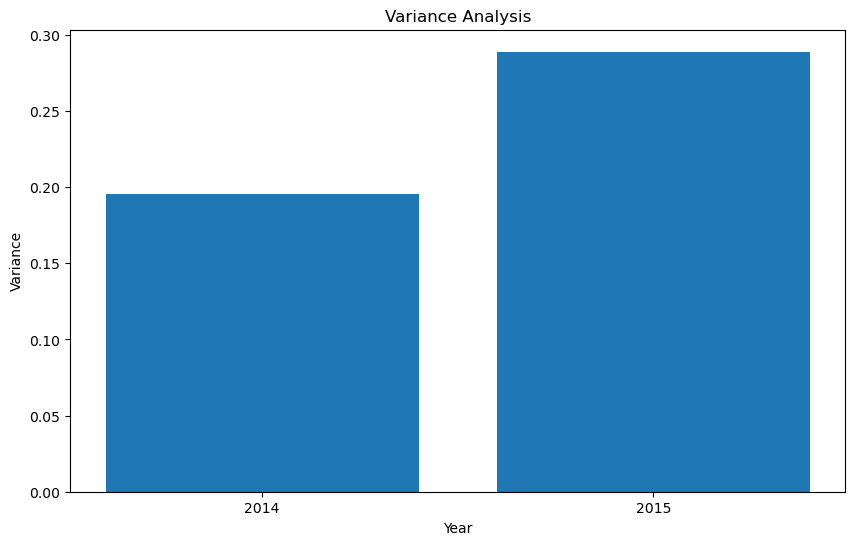

In [56]:
# visualization irl 2014-2015

data = {
    '2014': [206.2, 205.4, 205.4, 205.6, 205.9, 206.0, 206.6],
    '2015': [206.2, 206.5, 206.8, 207.2, 207.6, 206.4, 207.4]
}

df = pd.DataFrame(data)

# Calculate the variance for each column (year)
variances = df.var()

# Drop any columns that contain NaN values
variances = variances.dropna()

# Plot the variances using a bar plot
plt.bar(variances.index, variances.values)
plt.xlabel('Year')
plt.ylabel('Variance')
plt.title('Variance Analysis')
plt.show()

In [57]:
# year 2014 - 2015 aus variace analysis

data = {
    '2014': [88.3,1.5, 2.5, 0.4, 89.3, 1.5, 90.2, 1.2],
    '2015': [88.9, 0.7, 1.8, 0.7, 90.3, 1.0, 91.5, 1.5]
}

df = pd.DataFrame(data)

# Perform variance analysis
results = variance_analysis(df)

# Print the results
print("Variances:")
print(results['variances'])
print("\nF-Statistic:", results['f_statistic'])
print("p-value:", results['p_value']) 

Variances:
2014   2067.646
2015   2126.771
dtype: float64

F-Statistic: 6.70534194370195e-05
p-value: 0.9935820456670429


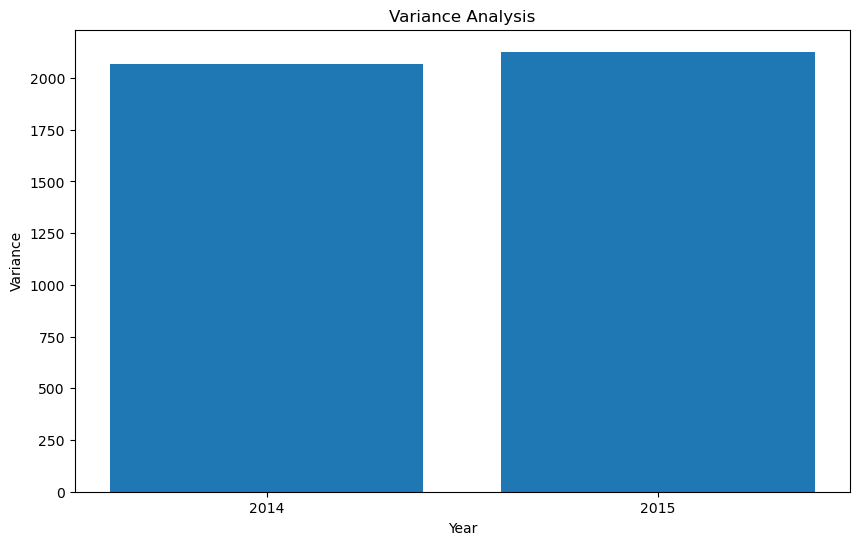

In [58]:
# visualisatioN variace aNalysis aus

df = pd.DataFrame(data)

# Calculate the variance for each column (year)
variances = df.var()

# Drop any columns that contain NaN values
variances = variances.dropna()

# Plot the variances using a bar plot
plt.bar(variances.index, variances.values)
plt.xlabel('Year')
plt.ylabel('Variance')
plt.title('Variance Analysis')
plt.show()

In [59]:
irl

,Month,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,January,109.200,113.500,115.900,118.000,122.900,126.300,135.800,154.300,169.900,174.200,179.600,184.700,189.900,198.800,207.400,208.000,206.900,210.200,202.500,204.100,204.900,206.200,207.400
1,February,109.300,114.100,115.700,118.500,123.100,126.400,136.100,154.700,170.000,174.500,179.700,184.800,190.100,198.800,208.200,207.300,207.200,210.500,202.600,204.200,205.400,206.000,207.100
2,March,109.400,114.100,115.900,118.800,123.800,126.500,136.400,155.600,169.500,174.500,179.900,184.900,190.600,199.400,208.600,206.800,207.300,200.700,202.700,204.300,205.400,206.500,0.000
3,April,110.300,114.100,115.900,119.800,123.800,130.500,136.500,157.400,169.500,177.300,179.900,186.500,194.000,200.000,208.900,206.500,207.900,201.000,203.400,204.500,205.600,206.800,0.000
4,May,110.100,114.100,115.900,119.800,124.500,130.500,136.800,157.600,169.500,177.300,180.000,186.600,194.200,200.100,209.400,206.500,208.700,201.200,203.600,204.500,205.900,207.200,0.000
5,June,110.600,114.100,116.000,119.900,124.500,130.500,136.900,157.700,169.700,177.400,180.200,186.600,194.300,200.300,209.900,206.000,208.600,201.400,203.600,204.800,206.000,207.600,0.000
6,July,110.700,114.500,116.000,120.800,125.700,131.500,137.200,161.100,173.800,177.100,181.100,186.700,194.400,203.700,210.400,206.000,209.400,201.500,204.100,204.800,206.000,207.400,0.000
7,August,110.900,114.500,116.000,121.000,125.700,131.500,137.200,165.900,173.900,177.200,182.200,186.900,194.500,203.600,210.400,206.000,209.600,201.900,204.100,205.000,206.600,207.400,0.000
8,September,112.200,115.700,116.900,121.500,126.000,134.100,137.700,166.000,173.900,177.200,182.200,186.900,194.600,203.700,210.500,206.100,209.500,202.100,203.700,205.100,206.400,207.300,0.000
9,October,112.700,115.800,117.100,122.000,126.200,134.700,153.800,169.300,173.900,177.200,183.900,189.500,197.700,203.800,210.100,206.200,209.500,202.000,203.800,205.400,206.700,207.200,0.000


CORRELATION

          year1994  year1995  year1996  year1997  year1998  year1999  year2000  year2001  year2002  year2003  year2004  year2005  year2006  year2007  year2008  year2009  year2010  year2011  year2012  year2013  year2014  year2015  year2016
year1994     1.000     0.939     0.917     0.954     0.901     0.962     0.716     0.940     0.780     0.711     0.920     0.910     0.893     0.861     0.803    -0.704     0.851    -0.487     0.730     0.968     0.890     0.684    -0.578
year1995     0.939     1.000     0.935     0.877     0.838     0.850     0.708     0.896     0.780     0.502     0.901     0.785     0.735     0.807     0.707    -0.587     0.739    -0.374     0.557     0.876     0.814     0.478    -0.464
year1996     0.917     0.935     1.000     0.780     0.735     0.801     0.775     0.834     0.675     0.415     0.866     0.773     0.695     0.697     0.549    -0.415     0.617    -0.289     0.425     0.819     0.688     0.415    -0.371
year1997     0.954     0.877     0.780     1

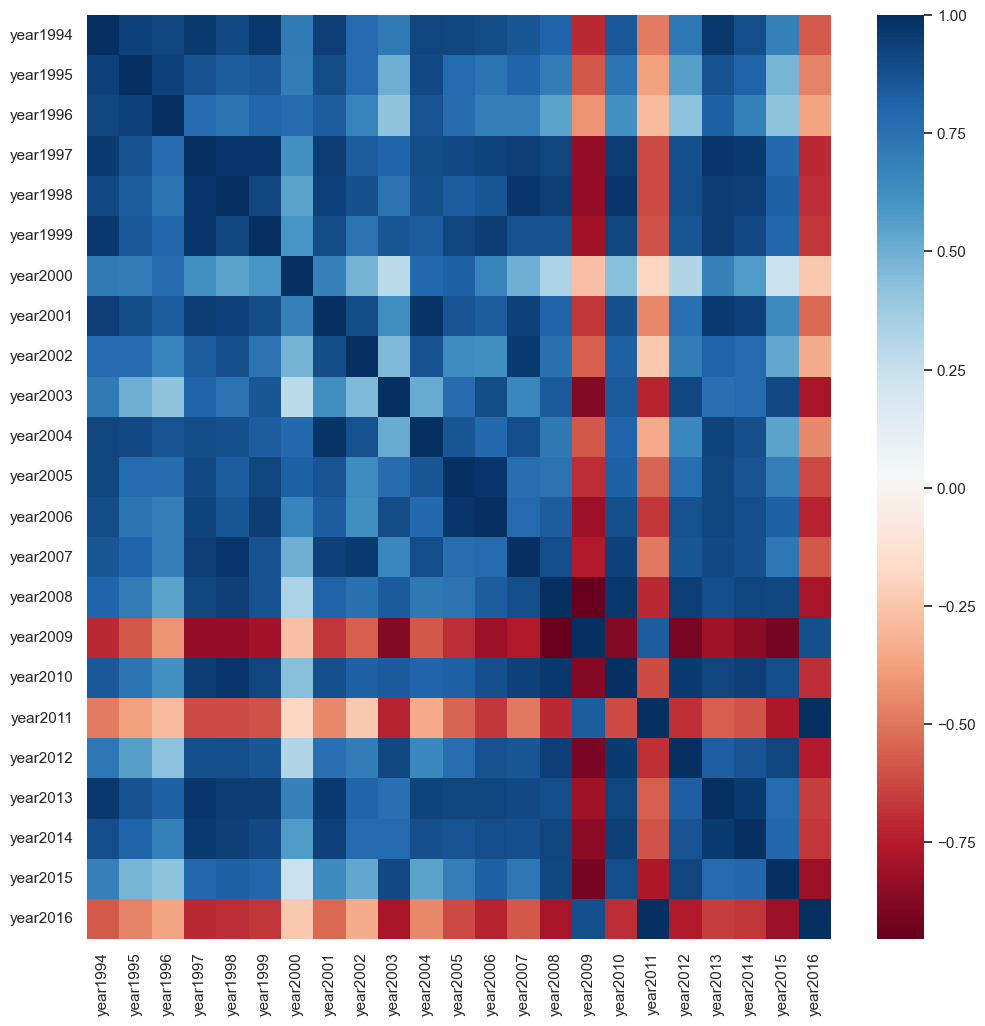

In [96]:
corr = irl[num_cols].corr()
print(corr)

sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr,cmap="RdBu")
plt.show(block=True)

In [97]:
corr.head()

,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
year1994,1.000,0.939,0.917,0.954,0.901,0.962,0.716,0.940,0.780,0.711,0.920,0.910,0.893,0.861,0.803,-0.704,0.851,-0.487,0.730,0.968,0.890,0.684,-0.578
year1995,0.939,1.000,0.935,0.877,0.838,0.850,0.708,0.896,0.780,0.502,0.901,0.785,0.735,0.807,0.707,-0.587,0.739,-0.374,0.557,0.876,0.814,0.478,-0.464
year1996,0.917,0.935,1.000,0.780,0.735,0.801,0.775,0.834,0.675,0.415,0.866,0.773,0.695,0.697,0.549,-0.415,0.617,-0.289,0.425,0.819,0.688,0.415,-0.371
year1997,0.954,0.877,0.780,1.000,0.972,0.973,0.613,0.951,0.833,0.809,0.900,0.906,0.928,0.940,0.919,-0.839,0.952,-0.618,0.881,0.975,0.954,0.792,-0.703
year1998,0.901,0.838,0.735,0.972,1.000,0.919,0.543,0.934,0.879,0.744,0.885,0.832,0.862,0.970,0.943,-0.836,0.971,-0.616,0.887,0.948,0.940,0.817,-0.700


          year1994  year1995  year1996  year1997  year1998  year1999  year2000  year2001  year2002  year2003  year2004  year2005  year2006  year2007  year2008  year2009  year2010  year2011  year2012  year2013  year2014  year2015  year2016
year1994     1.000     0.369    -0.178    -0.176    -0.172    -0.160    -0.157    -0.152    -0.150    -0.138    -0.122    -0.132    -0.118    -0.117    -0.114    -0.137    -0.134    -0.137    -0.138    -0.133    -0.136    -0.132    -0.136
year1995     0.369     1.000     0.687     0.690     0.696     0.706     0.711     0.717     0.721     0.730     0.743     0.742     0.750     0.753     0.757     0.743     0.741     0.738     0.736     0.739     0.738     0.741     0.739
year1996    -0.178     0.687     1.000     1.000     1.000     0.999     0.999     0.999     0.999     0.998     0.996     0.996     0.996     0.995     0.994     0.995     0.996     0.996     0.997     0.997     0.997     0.997     0.997
year1997    -0.176     0.690     1.000     1

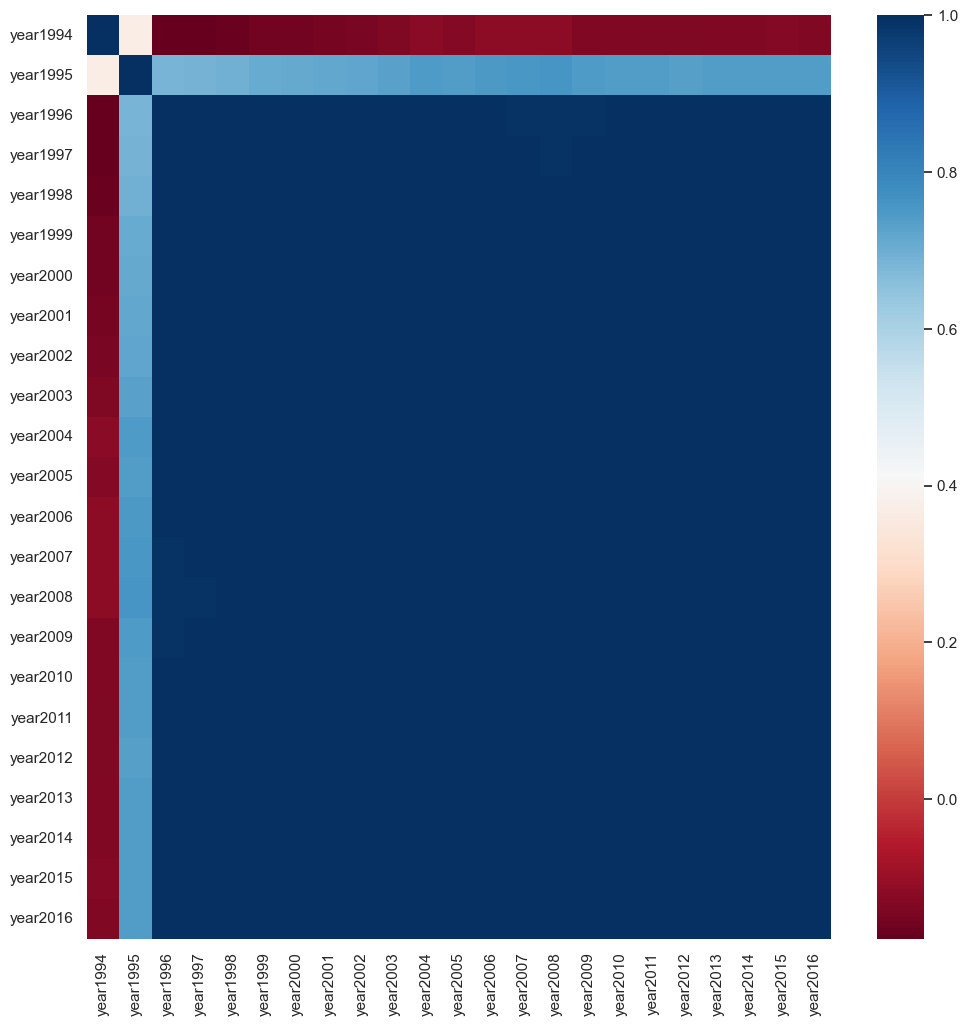

In [98]:
corr = aus[num_cols].corr()
print(corr)

sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr,cmap="RdBu")
plt.show(block=True)

In [100]:
corr.head()

,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
year1994,1.000,0.369,-0.178,-0.176,-0.172,-0.160,-0.157,-0.152,-0.150,-0.138,-0.122,-0.132,-0.118,-0.117,-0.114,-0.137,-0.134,-0.137,-0.138,-0.133,-0.136,-0.132,-0.136
year1995,0.369,1.000,0.687,0.690,0.696,0.706,0.711,0.717,0.721,0.730,0.743,0.742,0.750,0.753,0.757,0.743,0.741,0.738,0.736,0.739,0.738,0.741,0.739
year1996,-0.178,0.687,1.000,1.000,1.000,0.999,0.999,0.999,0.999,0.998,0.996,0.996,0.996,0.995,0.994,0.995,0.996,0.996,0.997,0.997,0.997,0.997,0.997
year1997,-0.176,0.690,1.000,1.000,1.000,0.999,0.999,0.999,0.999,0.998,0.996,0.997,0.996,0.996,0.995,0.996,0.997,0.997,0.997,0.997,0.997,0.997,0.997
year1998,-0.172,0.696,1.000,1.000,1.000,1.000,1.000,0.999,0.999,0.999,0.997,0.998,0.997,0.996,0.996,0.996,0.996,0.997,0.998,0.998,0.998,0.998,0.998


Geographical 

C:\Users\TOLGA BOROĞLU\AppData\Local\Temp\ipykernel_18628\1031766209.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


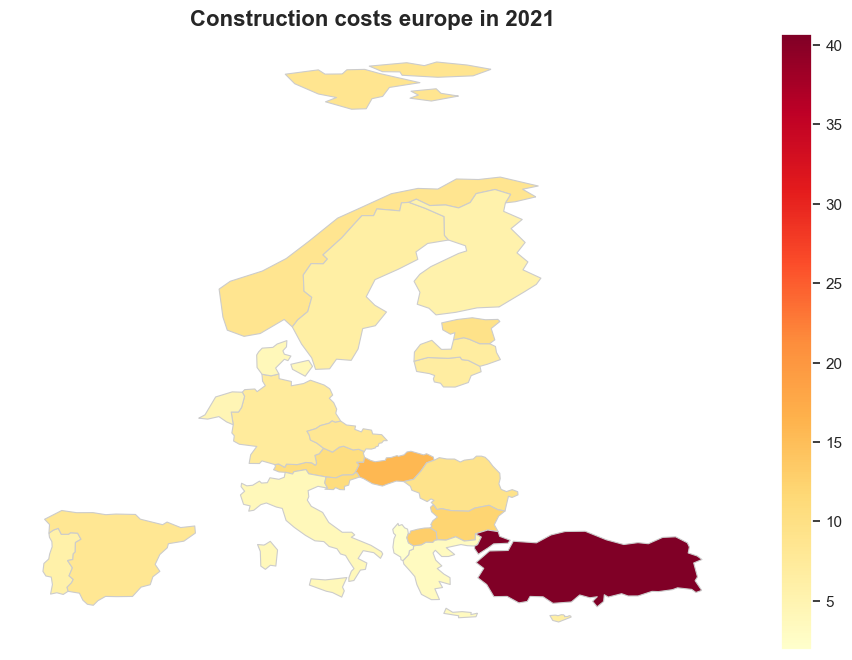

In [62]:

# Read the shapefile for world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the data DataFrame
merged = world.merge(pd.DataFrame(eu), left_on='name', right_on='Country', how='left')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data on the map
merged.plot(column='2021', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Construction costs europe in 2021', fontdict={'fontsize': '16', 'fontweight': 'bold'})
ax.axis('off')

# Show the plot
plt.show()

# Machine Learning Data Analysis

Encoding

In [63]:
# load datasets
irl =  pd.read_excel("dash_irl.xlsx")
aus = pd.read_excel("aus.xlsx") 
eu = pd.read_excel("Construction costs europe.xlsx")

In [64]:
irl

,Month,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,January,109.200,113.500,115.900,118.000,122.900,126.300,135.800,154.300,169.900,174.200,179.600,184.700,189.900,198.800,207.400,208.000,206.900,210.200,202.500,204.100,204.900,206.200,207.400
1,February,109.300,114.100,115.700,118.500,123.100,126.400,136.100,154.700,170.000,174.500,179.700,184.800,190.100,198.800,208.200,207.300,207.200,210.500,202.600,204.200,205.400,206.000,207.100
2,March,109.400,114.100,115.900,118.800,123.800,126.500,136.400,155.600,169.500,174.500,179.900,184.900,190.600,199.400,208.600,206.800,207.300,200.700,202.700,204.300,205.400,206.500,0.000
3,April,110.300,114.100,115.900,119.800,123.800,130.500,136.500,157.400,169.500,177.300,179.900,186.500,194.000,200.000,208.900,206.500,207.900,201.000,203.400,204.500,205.600,206.800,0.000
4,May,110.100,114.100,115.900,119.800,124.500,130.500,136.800,157.600,169.500,177.300,180.000,186.600,194.200,200.100,209.400,206.500,208.700,201.200,203.600,204.500,205.900,207.200,0.000
5,June,110.600,114.100,116.000,119.900,124.500,130.500,136.900,157.700,169.700,177.400,180.200,186.600,194.300,200.300,209.900,206.000,208.600,201.400,203.600,204.800,206.000,207.600,0.000
6,July,110.700,114.500,116.000,120.800,125.700,131.500,137.200,161.100,173.800,177.100,181.100,186.700,194.400,203.700,210.400,206.000,209.400,201.500,204.100,204.800,206.000,207.400,0.000
7,August,110.900,114.500,116.000,121.000,125.700,131.500,137.200,165.900,173.900,177.200,182.200,186.900,194.500,203.600,210.400,206.000,209.600,201.900,204.100,205.000,206.600,207.400,0.000
8,September,112.200,115.700,116.900,121.500,126.000,134.100,137.700,166.000,173.900,177.200,182.200,186.900,194.600,203.700,210.500,206.100,209.500,202.100,203.700,205.100,206.400,207.300,0.000
9,October,112.700,115.800,117.100,122.000,126.200,134.700,153.800,169.300,173.900,177.200,183.900,189.500,197.700,203.800,210.100,206.200,209.500,202.000,203.800,205.400,206.700,207.200,0.000


Clustering

In [65]:


# Read the data into a DataFrame
data = pd.DataFrame({
    '1994': [109.200, 109.300, 109.400, 110.300, 110.100, 110.600, 110.700, 110.900, 112.200, 112.700],
    '1995': [113.500, 114.100, 114.100, 114.100, 114.100, 114.100, 114.500, 114.500, 115.700, 115.800],
    '1996': [115.900, 115.700, 115.900, 115.900, 115.900, 116.000, 116.000, 116.000, 116.900, 117.100],
    
})

# Perform clustering using K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['Cluster'] = labels

# Print the resulting clusters
print(data)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     1994    1995    1996  Cluster
0 109.200 113.500 115.900        2
1 109.300 114.100 115.700        2
2 109.400 114.100 115.900        2
3 110.300 114.100 115.900        0
4 110.100 114.100 115.900        0
5 110.600 114.100 116.000        0
6 110.700 114.500 116.000        0
7 110.900 114.500 116.000        0
8 112.200 115.700 116.900        1
9 112.700 115.800 117.100        1


In [66]:
# Read the data into a DataFrame
data = pd.DataFrame({
    '1994': [0.0, 0.0, 61.0, 62.1],
    '1995': [0.0, 0.0, 0.0, 0.0],
    '1996': [61.0, 0.0, 0.0, 0.0],

})

# Perform clustering using K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['Cluster'] = labels

# Print the resulting clusters
print(data)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    1994  1995   1996  Cluster
0  0.000 0.000 61.000        2
1  0.000 0.000  0.000        1
2 61.000 0.000  0.000        0
3 62.100 0.000  0.000        0


In [67]:
irl = pd.get_dummies(irl,columns=["Month"], dummy_na=True)

In [68]:
irl

,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016,Month_April,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_October,Month_September,Month_nan
0,109.200,113.500,115.900,118.000,122.900,126.300,135.800,154.300,169.900,174.200,179.600,184.700,189.900,198.800,207.400,208.000,206.900,210.200,202.500,204.100,204.900,206.200,207.400,0,0,0,1,0,0,0,0,0,0,0
1,109.300,114.100,115.700,118.500,123.100,126.400,136.100,154.700,170.000,174.500,179.700,184.800,190.100,198.800,208.200,207.300,207.200,210.500,202.600,204.200,205.400,206.000,207.100,0,0,1,0,0,0,0,0,0,0,0
2,109.400,114.100,115.900,118.800,123.800,126.500,136.400,155.600,169.500,174.500,179.900,184.900,190.600,199.400,208.600,206.800,207.300,200.700,202.700,204.300,205.400,206.500,0.000,0,0,0,0,0,0,1,0,0,0,0
3,110.300,114.100,115.900,119.800,123.800,130.500,136.500,157.400,169.500,177.300,179.900,186.500,194.000,200.000,208.900,206.500,207.900,201.000,203.400,204.500,205.600,206.800,0.000,1,0,0,0,0,0,0,0,0,0,0
4,110.100,114.100,115.900,119.800,124.500,130.500,136.800,157.600,169.500,177.300,180.000,186.600,194.200,200.100,209.400,206.500,208.700,201.200,203.600,204.500,205.900,207.200,0.000,0,0,0,0,0,0,0,1,0,0,0
5,110.600,114.100,116.000,119.900,124.500,130.500,136.900,157.700,169.700,177.400,180.200,186.600,194.300,200.300,209.900,206.000,208.600,201.400,203.600,204.800,206.000,207.600,0.000,0,0,0,0,0,1,0,0,0,0,0
6,110.700,114.500,116.000,120.800,125.700,131.500,137.200,161.100,173.800,177.100,181.100,186.700,194.400,203.700,210.400,206.000,209.400,201.500,204.100,204.800,206.000,207.400,0.000,0,0,0,0,1,0,0,0,0,0,0
7,110.900,114.500,116.000,121.000,125.700,131.500,137.200,165.900,173.900,177.200,182.200,186.900,194.500,203.600,210.400,206.000,209.600,201.900,204.100,205.000,206.600,207.400,0.000,0,1,0,0,0,0,0,0,0,0,0
8,112.200,115.700,116.900,121.500,126.000,134.100,137.700,166.000,173.900,177.200,182.200,186.900,194.600,203.700,210.500,206.100,209.500,202.100,203.700,205.100,206.400,207.300,0.000,0,0,0,0,0,0,0,0,0,1,0
9,112.700,115.800,117.100,122.000,126.200,134.700,153.800,169.300,173.900,177.200,183.900,189.500,197.700,203.800,210.100,206.200,209.500,202.000,203.800,205.400,206.700,207.200,0.000,0,0,0,0,0,0,0,0,1,0,0


In [69]:
aus

,year1994,year1995,year1996,year1997,year1998,year1999,year2000,year2001,year2002,year2003,year2004,year2005,year2006,year2007,year2008,year2009,year2010,year2011,year2012,year2013,year2014,year2015,year2016
0,0.000,0.000,61.000,62.100,62.700,62.800,63.400,64.100,64.500,65.100,66.400,67.600,69.400,72.100,75.600,78.100,81.200,83.700,85.900,87.000,88.300,88.900,90.100
1,0.000,0.000,0.000,1.800,0.900,0.200,0.900,1.100,0.700,0.900,2.000,1.800,2.700,3.800,5.000,3.300,3.900,3.100,2.600,1.300,1.500,0.700,1.300
2,61.000,0.000,0.000,1.500,1.300,1.100,1.400,1.800,1.300,1.500,3.000,2.600,2.900,4.300,4.800,2.200,1.800,2.800,2.600,2.500,2.500,1.800,1.900
3,62.100,0.000,0.000,2.500,0.100,-1.100,0.300,-0.100,-0.300,-0.200,0.200,0.500,2.400,3.200,5.100,4.600,6.200,3.500,2.600,-0.100,0.400,-0.700,0.600
4,62.700,52.800,53.500,55.200,56.300,57.700,59.100,60.800,61.900,63.800,67.000,68.300,71.300,75.000,79.700,80.200,82.600,84.600,86.400,88.000,89.300,90.300,91.500
5,62.800,3.200,1.500,3.100,2.100,2.500,2.300,2.900,1.800,3.100,5.000,1.900,4.500,5.100,6.300,0.700,2.900,2.400,2.200,1.900,1.500,1.000,1.400
6,63.400,55.200,56.100,57.600,58.900,60.100,61.500,62.800,63.700,65.400,68.800,70.200,73.400,76.700,80.700,81.200,83.800,85.700,87.500,89.100,90.200,91.500,92.100
7,64.100,3.400,1.600,2.700,2.200,2.100,2.300,2.100,1.500,2.600,5.100,2.100,4.600,4.500,5.200,0.600,3.200,2.200,2.100,1.900,1.200,1.500,0.600


Linear Regression Irl 2014-2015

In [70]:
X = irl.drop('year2014',axis=1).values
y = irl['year2014'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (8, 33)
Size of y_train :  (8, 1)
Size of X_test :  (2, 33)
Size of Y_test :  (2, 1)


In [71]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [72]:
# Create an instance of Linear Regression model
model = LinearRegression()

# Fit the model with training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Squared Error: ', mse)
print('R-squared: ', r2)

Mean Squared Error:  0.09952840319283998
R-squared:  0.6018863872286401


Linear Regression Aus 2014-2015

In [73]:
X = aus.drop('year2014',axis=1).values
y = aus['year2014'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (6, 22)
Size of y_train :  (6, 1)
Size of X_test :  (2, 22)
Size of Y_test :  (2, 1)


In [74]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [75]:
# Create an instance of Linear Regression model
model = LinearRegression()

# Fit the model with training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Squared Error: ', mse)
print('R-squared: ', r2)

Mean Squared Error:  0.9491741076679562
R-squared:  0.0
